# **Simple Linear Regression**

### Taking the Dataset from the Sklearn datasets

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
X.shape

(506, 13)

In [4]:
y = boston.target
y.shape

(506,)

In [5]:
# Standardizing the data (Without using inbuilt libraries)

X = (X - X.mean())/(X.std())

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

c:\users\manoj\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ZN'>

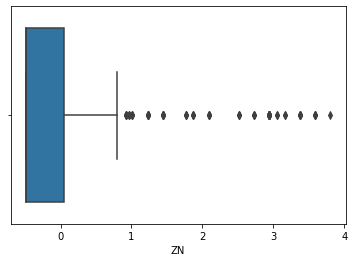

In [8]:
# Seeing the outliers

sns.boxplot(X.ZN)

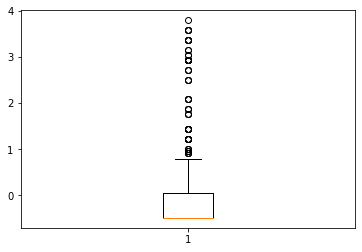

In [9]:
plt.boxplot(X.ZN)
plt.show()

In [10]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

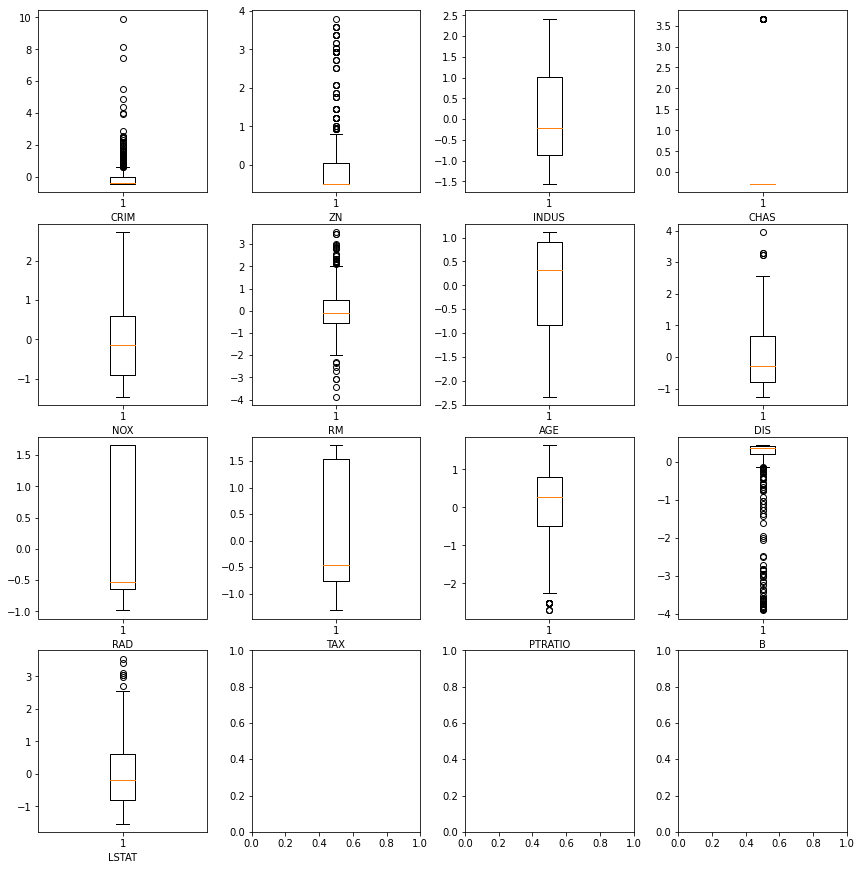

In [11]:
fig, ax = plt.subplots(4,4, figsize = (12,12))
plt.tight_layout() # this is just to ge 
columns = X.columns
col = 0

for i in range(0, 4):
    for j in range(0, 4):
        if col < len(columns):
            ax[i, j].boxplot(X[columns[col]])
#             ax[i, j].hist(X[columns[col]])
            ax[i, j].set_xlabel(columns[col])
            col = col +1 

In [12]:
## Doing Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Fitting the model

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
print(linreg.intercept_)
print(linreg.coef_)

22.530170789829878
[-1.02086184  1.27801361  0.16664754  0.74979343 -2.15543777  2.45295328
  0.10920171 -3.18295032  3.07959972 -2.46785221 -1.95840996  0.72333806
 -3.77234936]


In [21]:
y_pred = linreg.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7714362847232976
